**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from string import digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/ruzcmc/sentimentanalysisCNN/master/fixed_data.csv"
data = pd.read_csv(url, encoding="latin1")
data

,Tweet,Class
0,"@e100ss ini lho mas, nama jalannya Jln. Totok ...",0
1,@TelkomCare @e100ss Sejak agustus akhir mati t...,0
2,@TelkomCare @e100ss perbaikan macam apa sampe ...,0
3,"@e100ss mohon info, ini kenapa ya sepanjang Jl...",0
4,Delay dibandara juanda..shrsnya brgkt jm18.35 ...,0
...,...,...
1495,RT @puturudy: @e100ss Sulit bs dipercy krn saa...,0
1496,@alfianhrdiansah @PDAMSurabaya @SapawargaSby @...,0
1497,RT @yudha_shanny: @e100ss \r\nTL ps besar temb...,0
1498,@e100ss Sulit bs dipercy krn saat ini sj tiap ...,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Preprocessing**

In [ ]:
data.isnull().sum()

Tweet    0
Class    0
dtype: int64

In [ ]:
!wget -O sw.csv https://raw.githubusercontent.com/ruzcmc/sentimentanalysisCNN/master/stopword.csv

--2022-12-20 21:03:45--  https://raw.githubusercontent.com/ruzcmc/sentimentanalysisCNN/master/stopword.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8362 (8.2K) [text/plain]
Saving to: ‘sw.csv’

sw.csv              100%[===================>]   8.17K  --.-KB/s    in 0s      

2022-12-20 21:03:45 (47.1 MB/s) - ‘sw.csv’ saved [8362/8362]



In [ ]:
stopword_corpus = open("/content/sw.csv",mode='r', encoding='UTF-8')
stopword = stopword_corpus.read()
stopword = stopword.split()

custom_sw = ["lho", "blas", "d", "donk", "eduaubdedubu", "nglewer", "trimsrssbayanewsupdate", "adeeemmmm", "mw", "cc"]
stopword.extend(custom_sw)

In [ ]:
def preprocess(tweet):
    no_link=[]
    for line in tweet:
        result=re.sub(r"http\S+","",line)
        no_link.append(result)
    
    no_retweet=[]
    for line in no_link:
        result=re.sub(r"RT","",line)
        no_retweet.append(result)
    
    no_username=[]
    for line in no_retweet:
        result=re.sub(r"(?:\@|https?\://)\S+", "", line)
        no_username.append(result)
        
    no_digits=[]
    for line in no_username:
        remove_digits=str.maketrans(' ', ' ', digits)
        result=line.translate(remove_digits)
        no_digits.append(result)
    
    no_comma=[]
    for line in no_digits :
        result=re.sub(r"[,./]+", " ", line)
        no_comma.append(result)
    
    no_punc=[]
    for line in no_comma:
        punc = set(string.punctuation)
        result = ''.join(x for x in line if x not in punc)
        no_punc.append(result)

    lower=[]
    for line in no_punc:
        result = line.lower()
        lower.append(result)
        
    stop=[]
    for line in lower:
        result = []
        line = line.split()
        for word in line :
            if word not in stopword:
                result.append(word)
        result = " ".join(result)
        stop.append(result)
    
    return stop

In [ ]:
label = data.Class
train = preprocess(data.Tweet)
word = " ".join(train)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(word)

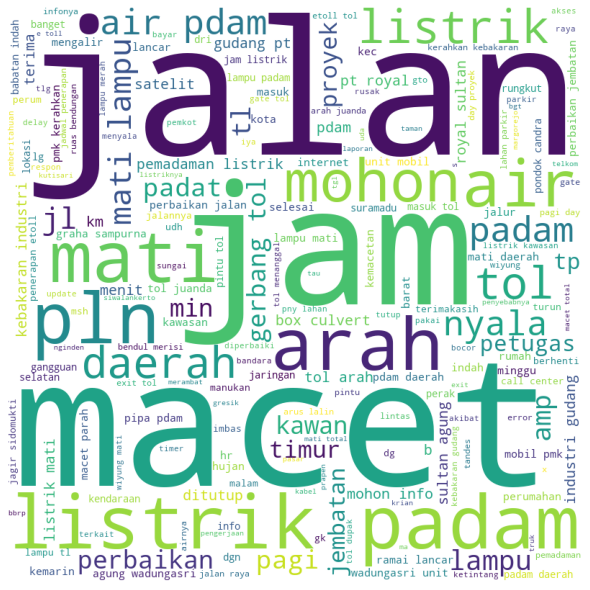

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**TF IDF**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train,data.Class,test_size=0.2, random_state = 10)

In [ ]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

X_train

<1200x2643 sparse matrix of type '<class 'numpy.float64'>'
	with 10369 stored elements in Compressed Sparse Row format>

In [ ]:
classifier = DecisionTreeClassifier(criterion="gini")
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(test_pred, y_test)
print("Accuracy : ",round(accuracy*100,2), "%")

Accuracy :  86.33 %


**Custom Input**

In [ ]:
input = ["lampunya sudah nyala", "jalan ramai lancar", "tol arah jakarta macet", "Alhamdulillah listrik sudah menyala kembali Terima kasih"]
input_pre = preprocess(input)

In [ ]:
x = vectorizer.transform(input_pre)
y_pred = classifier.predict(x)

hasil = pd.DataFrame(list(zip(input_pre, y_pred)), columns =['Teks', 'Sentimen'])
hasil

,Teks,Sentimen
0,lampunya nyala,1
1,jalan ramai lancar,1
2,tol arah jakarta macet,0
3,alhamdulillah listrik menyala terima,1
